# RQ2 Analysis (CRUD operations)

### comparison between server and laptop runs

In [63]:
import pandas as pd
df0 = pd.read_csv('../results/RQ2/DeleteCrossRef/DeleteCrossRef_run_0.csv') 
df1 = pd.read_csv('../results/RQ2/DeleteCrossRef/DeleteCrossRef_run_1.csv') 

df0 = df0.sort_values(by="element_count").reset_index(drop=True)
df1 = df1.sort_values(by="element_count").reset_index(drop=True)

merged = df0.merge(df1, on="element_count", suffixes=('_server', '_laptop'))

merged['time_diff'] = merged['time_laptop'] - merged['time_server']
merged['mem_diff'] = merged['mem_laptop'] - merged['mem_server'] 

merged = merged[['element_count', 'time_server', 'time_laptop', 'time_diff', 'mem_server', 'mem_laptop', 'mem_diff']]

merged.head(10)

,element_count,time_server,time_laptop,time_diff,mem_server,mem_laptop,mem_diff
0,10,24,13,-11,35880,395,-35485
1,50,12,16,4,35880,337,-35543
2,100,14,11,-3,35880,342,-35538
3,500,23,30,7,42421,310,-42111
4,1000,33,28,-5,35880,357,-35523
5,5000,229,36,-193,35128,567,-34561
6,10000,717,46,-671,35127,953,-34174
7,50000,18255,289,-17966,35128,4143,-30985
8,100000,71499,754,-70745,35128,8071,-27057
9,400000,2071744,9382,-2062362,65604,14350,-51254


## Graph Types

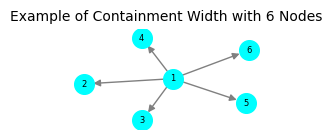

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6]) 
G.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6)])
pos = nx.spring_layout(G) 
plt.figure(figsize=(2, 1)) 
nx.draw(G, pos=pos, with_labels=True, node_color='cyan', node_size=200,
        edge_color='gray', font_size=6, arrows=True, arrowstyle='-|>', arrowsize=10)
plt.title("Example of Containment Width with 6 Nodes", fontsize=10)
plt.axis('off')
plt.show()

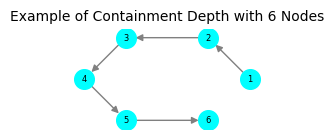

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
 
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6]) 
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]) 
pos = nx.circular_layout(G) 
plt.figure(figsize=(2, 1)) 
nx.draw(G, pos=pos, with_labels=True, node_color='cyan', node_size=200,
        edge_color='gray', font_size=6, arrows=True, arrowstyle='-|>', arrowsize=10)
plt.title("Example of Containment Depth with 6 Nodes", fontsize=10)
plt.axis('off')
plt.show()

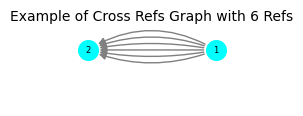

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.MultiDiGraph()
G.add_nodes_from([1, 2]) 
G.add_edges_from([(1, 2), (1, 2), (1, 2), (1, 2), (1, 2),(1, 2)])  
pos = nx.circular_layout(G)
plt.figure(figsize=(2, 1))
nx.draw_networkx_nodes(G, pos, node_color='cyan', node_size=200)
nx.draw_networkx_labels(G, pos, font_size=6)
for i, edge in enumerate(G.edges(keys=True)):
    rad = 0.1 * (i - 2)   
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])],
                           connectionstyle=f'arc3,rad={rad}',
                           edge_color='gray', arrows=True, arrowstyle='-|>', arrowsize=10)
plt.title("Example of Cross Refs Graph with 6 Refs", fontsize=10)
plt.axis('off')
plt.show()

# Results

## Create Operations

#### Create Single

In [4]:
import pandas as pd
import glob

# Find all CreateSingle_run_*.csv files
create_run_files = glob.glob('../results/RQ2/CreateSingle/CreateSingle_run_*.csv')

# Load and concatenate all runs
create_runs = pd.concat([pd.read_csv(f) for f in create_run_files], ignore_index=True)

ordered_create_runs = create_runs.sort_values('time',ascending=False)

ordered_create_runs.head(10)

,element_count,time,mem
19,400000,3638,158459
9,400000,3385,128105
29,300000,2945,156489
39,300000,2891,77226
38,100000,1038,57904
28,100000,984,74339
18,100000,929,47537
8,100000,878,42209
48,100000,842,111907
17,50000,494,25774


In [5]:
# Group by element count
group_col = 'element_count' 

grouped = create_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,7.8,5,17,671.2,551,731
1,50,5.4,4,7,649.6,510,715
2,100,5.4,5,6,644.4,490,711
3,500,8.4,8,9,1014.4,976,1024
4,1000,12.0,11,13,2092.2,1804,2219
5,5000,52.6,31,71,8960.0,8679,9078
6,10000,86.8,78,97,17537.8,17356,17922
7,50000,452.2,407,494,41909.0,24755,68892
8,100000,934.2,842,1038,66779.2,42209,111907
9,300000,2918.0,2891,2945,116857.5,77226,156489


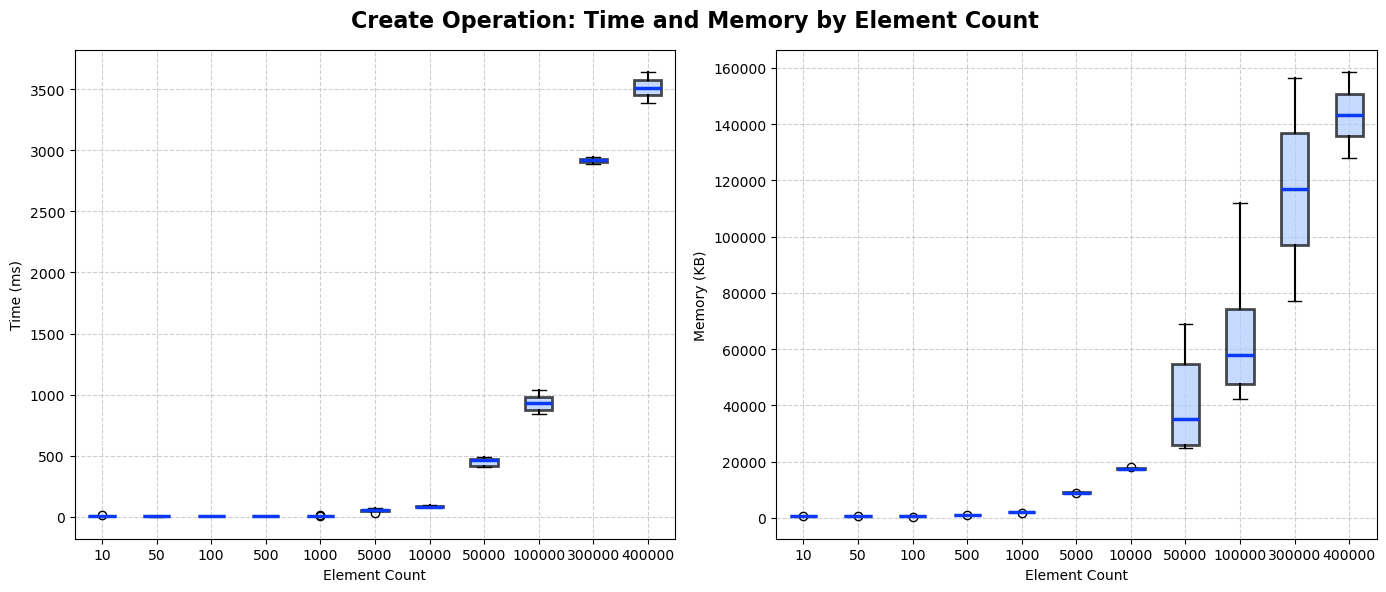

In [6]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
create_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
create_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Create Operation: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Create Containment Width

In [7]:
import pandas as pd
import glob

# Find all CreateContainmentWidth_run_*.csv files
create_containment_run_files = glob.glob('../results/RQ2/CreateContainmentWidth/CreateContainmentWidth_run_*.csv')

# Load and concatenate all runs
create_containment_runs = pd.concat([pd.read_csv(f) for f in create_containment_run_files], ignore_index=True)

ordered_create_runs_containment = create_containment_runs.sort_values('time',ascending=False)

ordered_create_runs.head(10)

,element_count,time,mem
19,400000,3638,158459
9,400000,3385,128105
29,300000,2945,156489
39,300000,2891,77226
38,100000,1038,57904
28,100000,984,74339
18,100000,929,47537
8,100000,878,42209
48,100000,842,111907
17,50000,494,25774


In [8]:
# Group by element count
group_col = 'element_count' 

grouped_containment = create_containment_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_containment.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,12.500000,8,17,778.833333,508,1016
1,50,12.166667,8,17,704.166667,423,890
2,100,13.000000,10,19,705.166667,448,890
3,500,26.500000,19,34,2004.333333,1844,2048
4,1000,37.000000,27,42,3633.166667,3324,3878
5,5000,156.333333,119,197,14657.000000,14336,14750
6,10000,268.833333,225,319,24805.833333,12664,28880
7,50000,1103.000000,1047,1156,58419.000000,42092,83355
8,100000,2207.666667,2014,2532,104528.333333,71781,155943
9,300000,5929.500000,5715,6144,248458.500000,219151,277766


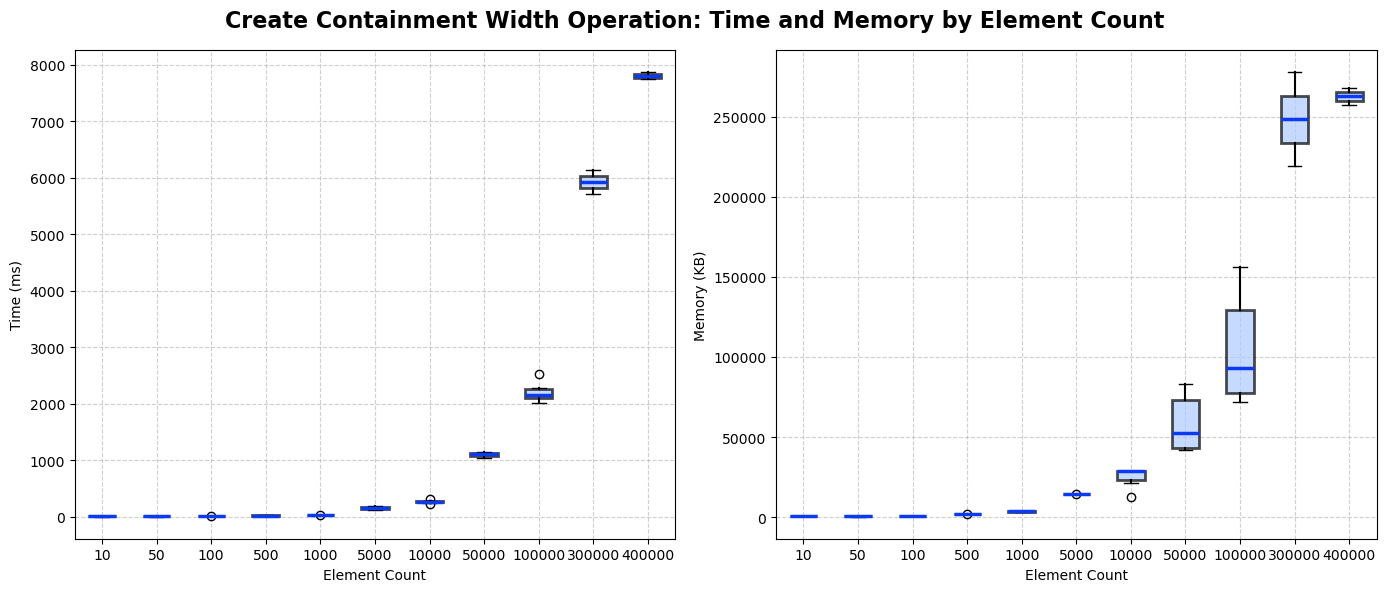

In [9]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
create_containment_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
create_containment_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Create Containment Width Operation: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Create Containment Depth

In [10]:
import pandas as pd
import glob

# Find all CreateContainmentDepth_run_*.csv files
create_containment_d_run_files = glob.glob('../results/RQ2/CreateContainmentDepth/CreateContainmentDepth_run_*.csv')

# Load and concatenate all runs
create_containment_d_runs = pd.concat([pd.read_csv(f) for f in create_containment_d_run_files], ignore_index=True)

ordered_create_runs_containment = create_containment_d_runs.sort_values('time',ascending=False)

ordered_create_runs.head(10)

,element_count,time,mem
19,400000,3638,158459
9,400000,3385,128105
29,300000,2945,156489
39,300000,2891,77226
38,100000,1038,57904
28,100000,984,74339
18,100000,929,47537
8,100000,878,42209
48,100000,842,111907
17,50000,494,25774


In [11]:
# Group by element count
group_col = 'element_count' 

grouped_containment_d = create_containment_d_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_containment_d.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,12.4,11,17,678.2,549,809
1,50,9.6,4,13,697.4,454,1029
2,100,11.6,9,14,686.4,454,896
3,500,22.6,20,26,2146.6,1863,2296
4,1000,33.2,22,41,3715.8,3591,4078
5,5000,123.6,105,140,16298.8,16152,16384
6,10000,260.6,225,331,30148.2,23341,31928
7,50000,1047.8,975,1150,76667.8,65633,90692
8,100000,1891.2,1643,2332,140013.0,112204,165105
9,300000,4908.0,4770,5046,303721.0,297197,310245


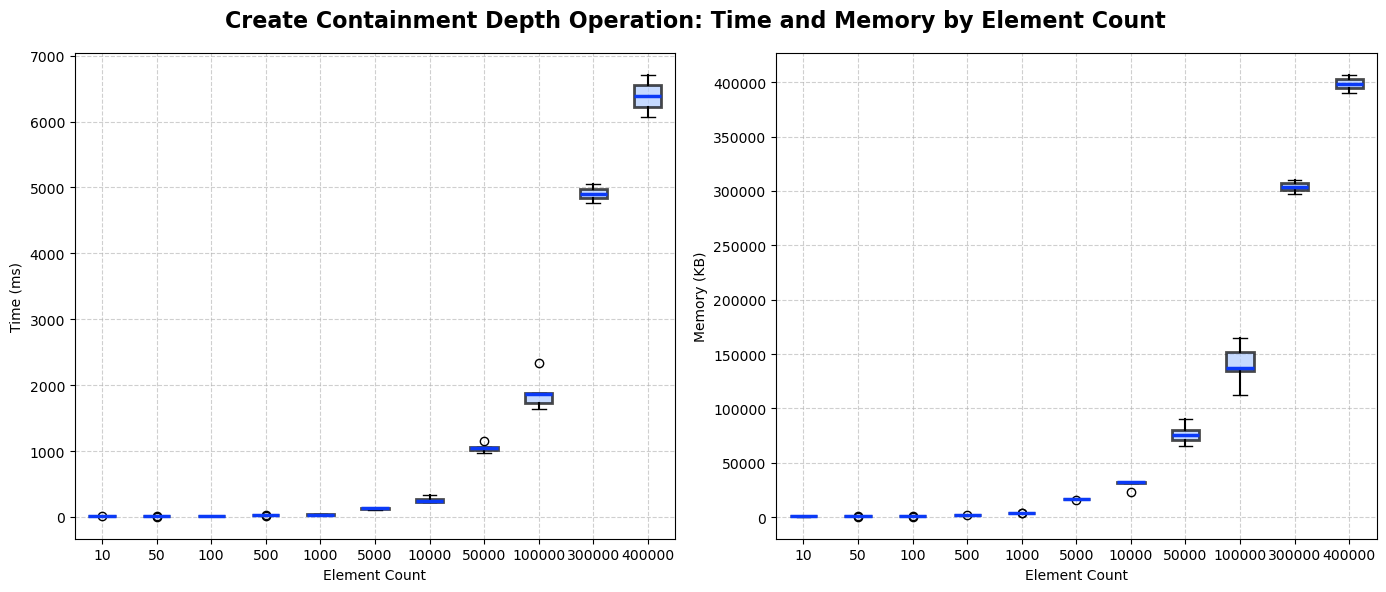

In [12]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
create_containment_d_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
create_containment_d_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Create Containment Depth Operation: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Create Cross Ref

In [13]:
import pandas as pd
import glob

# Find all CreateContainmentWidth_run_*.csv files
create_cross_ref_run_files = glob.glob('../results/RQ2/CreateCrossRef/CreateCrossRef_run_*.csv')

# Load and concatenate all runs
create_cross_ref_run = pd.concat([pd.read_csv(f) for f in create_cross_ref_run_files], ignore_index=True)

ordered_create_cross_ref_run = create_cross_ref_run.sort_values('time',ascending=False)

ordered_create_cross_ref_run.head(10)

,element_count,time,mem
28,400000,7471,103732
18,400000,6756,99756
38,300000,5494,85481
48,300000,5234,80677
27,100000,1855,44002
17,100000,1714,44974
37,100000,1593,31635
47,100000,1553,32180
8,100000,1367,43716
57,100000,1322,34891


In [14]:
# Group by element count
group_col = 'element_count' 

grouped_cross_ref = create_cross_ref_run.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_cross_ref.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,6.166667,5,8,663.666667,577,704
1,50,41.833333,19,86,646.666667,550,686
2,100,6.833333,6,8,634.333333,489,686
3,500,34.500000,15,67,860.166667,811,1017
4,1000,21.000000,15,28,1491.500000,1448,1524
5,5000,104.000000,74,185,5437.833333,5415,5458
6,10000,147.666667,130,170,10268.833333,10210,10443
7,50000,763.333333,635,880,30308.500000,17577,50813
8,100000,1567.333333,1322,1855,38566.333333,31635,44974
9,300000,5364.000000,5234,5494,83079.000000,80677,85481


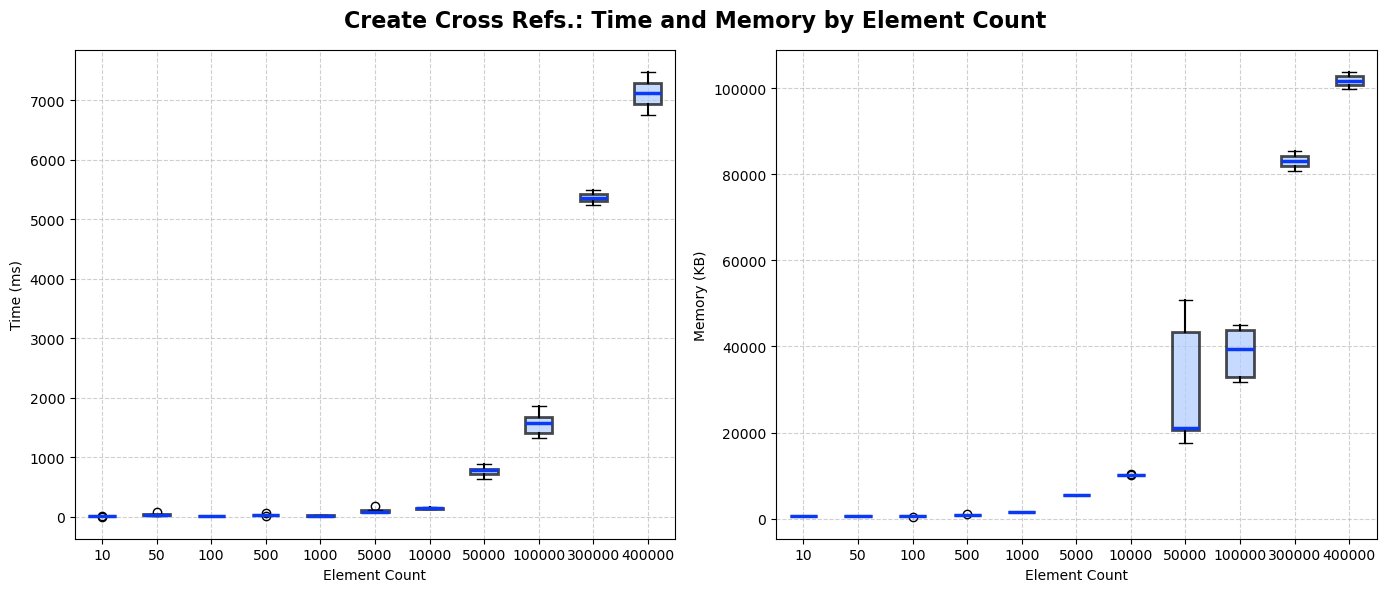

In [15]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
create_cross_ref_run.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
create_cross_ref_run.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Create Cross Refs.: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Read Operations

### Read 

In [16]:
import pandas as pd
import glob

 
read_run_files = glob.glob('../results/RQ2/Read/Read_run_*.csv')

# Load and concatenate all runs
read_runs = pd.concat([pd.read_csv(f) for f in read_run_files], ignore_index=True)

ordered_read_runs = read_runs.sort_values('time',ascending=False)

ordered_read_runs.head(10)

,element_count,time,mem
18,400000,2322,189744
38,300000,1926,135867
28,300000,1784,141092
27,100000,551,54005
37,100000,525,51439
17,100000,490,45647
8,100000,402,46954
47,100000,369,58407
26,50000,275,29494
36,50000,260,28945


In [17]:
# Group by element count
group_col = 'element_count' 

grouped_read = read_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_read.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,46.8,8,70,749.0,611,886
1,50,3.6,2,5,675.0,522,861
2,100,3.6,2,5,663.2,503,820
3,500,5.2,5,6,795.8,704,1001
4,1000,6.8,5,10,1716.4,1520,1841
5,5000,22.8,20,27,6338.4,6144,6540
6,10000,43.4,33,50,13796.6,13418,14021
7,50000,221.8,153,275,35584.2,28945,47947
8,100000,467.4,369,551,51290.4,45647,58407
9,300000,1855.0,1784,1926,138479.5,135867,141092


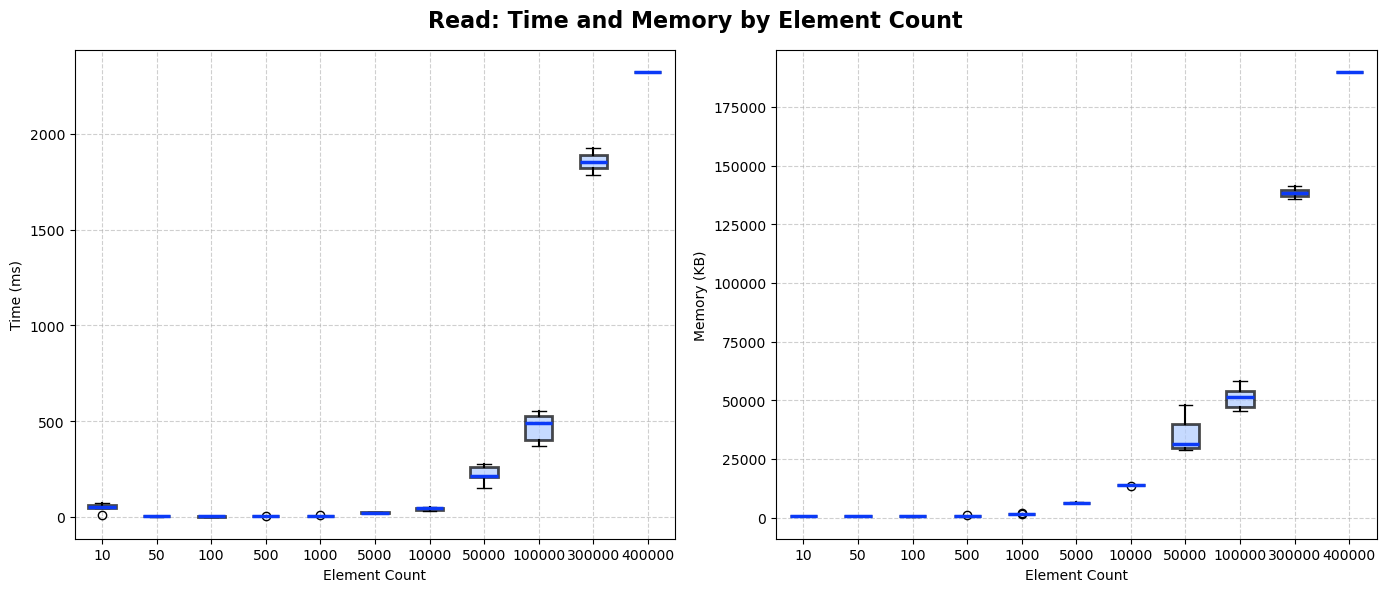

In [18]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
read_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
read_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Read: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Read Containment Width

In [19]:
import pandas as pd
import glob

 
read_c_w_run_files = glob.glob('../results/RQ2/ReadContainmentWidth/ReadContainmentWidth_run_*.csv')

# Load and concatenate all runs
read_c_w_runs = pd.concat([pd.read_csv(f) for f in read_c_w_run_files], ignore_index=True)

ordered_read_c_w_runs = read_c_w_runs.sort_values('time',ascending=False)

ordered_read_c_w_runs.head(10)

,element_count,time,mem
18,400000,2574,191620
38,300000,1884,136408
48,300000,1716,136958
28,300000,1697,142615
17,100000,705,49115
37,100000,588,45275
47,100000,567,50604
27,100000,537,54225
8,100000,433,49609
57,100000,403,49690


In [20]:
# Group by element count
group_col = 'element_count' 

grouped_read_c_w_runs = read_c_w_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_read_c_w_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,38.166667,3,65,638.500000,496,746
1,50,2.833333,1,4,615.833333,446,719
2,100,3.333333,2,5,612.333333,445,718
3,500,13.666667,5,47,901.333333,763,1024
4,1000,6.500000,4,8,1749.833333,1612,1942
5,5000,25.333333,14,37,6199.333333,6144,6270
6,10000,50.333333,26,68,13930.666667,13738,14015
7,50000,234.833333,173,280,35283.833333,30901,39712
8,100000,538.833333,403,705,49753.000000,45275,54225
9,300000,1765.666667,1697,1884,138660.333333,136408,142615


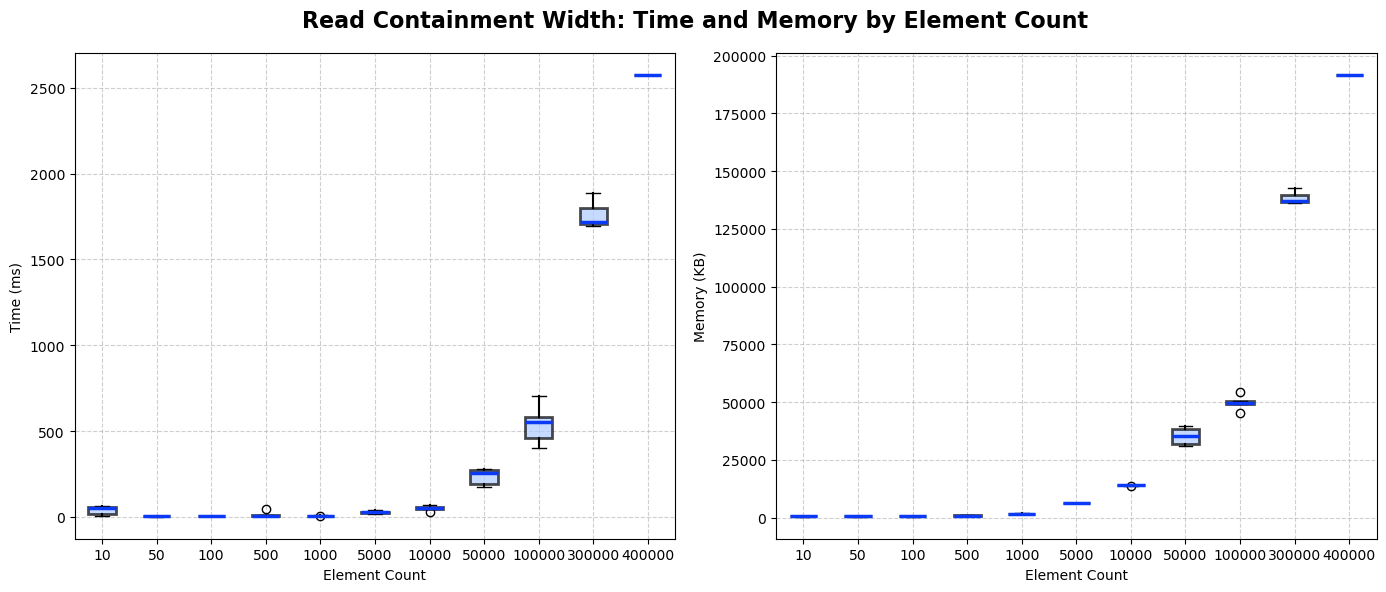

In [21]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
read_c_w_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
read_c_w_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Read Containment Width: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Read Containment Depth

In [22]:
import pandas as pd
import glob

 
read_c_d_run_files = glob.glob('../results/RQ2/ReadContainmentDepth/ReadContainmentDepth_run_*.csv')

# Load and concatenate all runs
read_c_d_runs = pd.concat([pd.read_csv(f) for f in read_c_d_run_files], ignore_index=True)

ordered_read_c_d_runs = read_c_d_runs.sort_values('time',ascending=False)

ordered_read_c_d_runs.head(10)

,element_count,time,mem
18,400000,2296,187946
28,300000,1880,143339
38,300000,1787,145728
48,300000,1738,141185
17,100000,604,46978
37,100000,585,43514
47,100000,556,45137
27,100000,538,46282
57,100000,395,72225
8,100000,386,54378


In [23]:
# Group by element count
group_col = 'element_count' 

grouped_read_c_w_runs = read_c_w_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_read_c_w_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,38.166667,3,65,638.500000,496,746
1,50,2.833333,1,4,615.833333,446,719
2,100,3.333333,2,5,612.333333,445,718
3,500,13.666667,5,47,901.333333,763,1024
4,1000,6.500000,4,8,1749.833333,1612,1942
5,5000,25.333333,14,37,6199.333333,6144,6270
6,10000,50.333333,26,68,13930.666667,13738,14015
7,50000,234.833333,173,280,35283.833333,30901,39712
8,100000,538.833333,403,705,49753.000000,45275,54225
9,300000,1765.666667,1697,1884,138660.333333,136408,142615


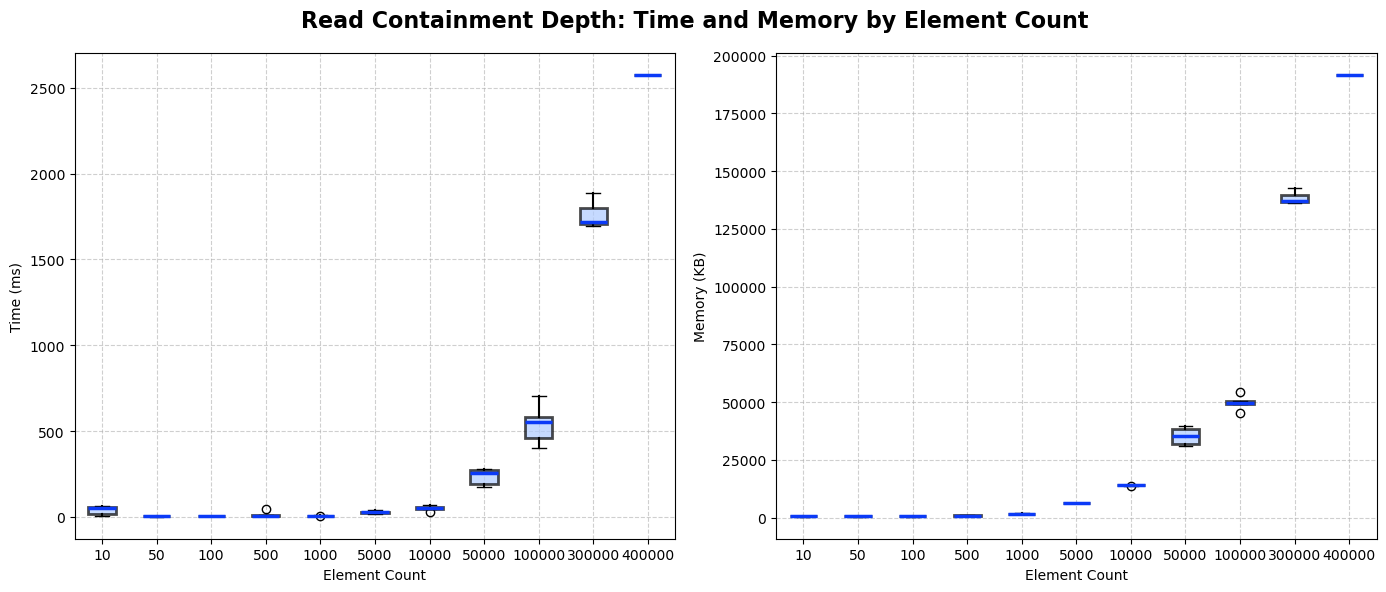

In [24]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
read_c_w_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
read_c_w_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Read Containment Depth: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Read Cross Ref

In [25]:
import pandas as pd
import glob

 
read_cross_ref_run_files = glob.glob('../results/RQ2/ReadCrossRef/ReadCrossRef_run_*.csv')

# Load and concatenate all runs
read_cross_ref_runs = pd.concat([pd.read_csv(f) for f in read_cross_ref_run_files], ignore_index=True)

ordered_read_cross_ref_runs = read_cross_ref_runs.sort_values('time',ascending=False)

ordered_read_cross_ref_runs.head(10)

,element_count,time,mem
29,10,288,800
9,10,271,669
43,1000,239,559
26,50000,208,584
22,500,175,586
39,10,163,611
19,10,160,653
0,10,146,476
10,50,144,665
30,50,143,650


In [26]:
# Group by element count
group_col = 'element_count' 

grouped_read_cross_ref_runs = read_cross_ref_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_read_cross_ref_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,176.500000,31,288,616.833333,476,800
1,50,82.666667,26,144,564.666667,454,665
2,100,77.000000,21,122,559.500000,457,662
3,500,79.333333,22,175,557.500000,445,662
4,1000,92.333333,22,239,555.000000,450,659
5,5000,77.000000,21,139,554.500000,430,659
6,10000,61.666667,21,100,554.666667,431,659
7,50000,82.333333,20,208,556.666667,445,659
8,100000,66.333333,19,108,557.333333,450,656
9,300000,74.000000,70,77,633.000000,559,704


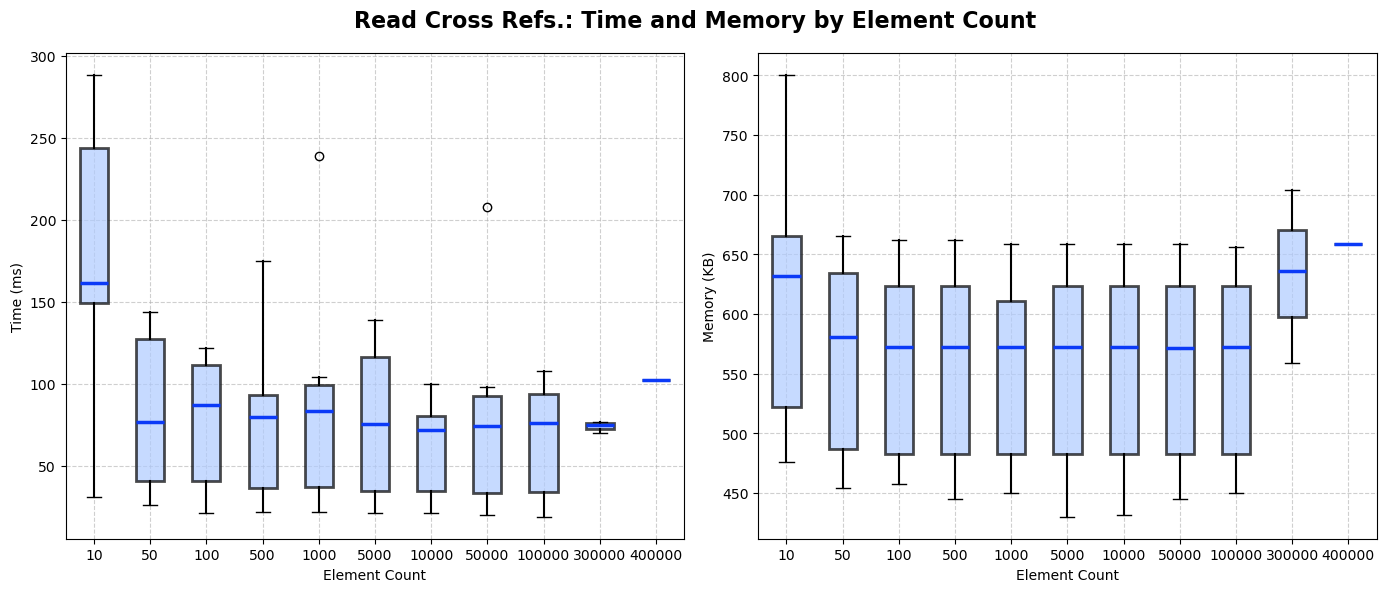

In [27]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
read_cross_ref_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
read_cross_ref_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Read Cross Refs.: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Update Operations

### Update

In [28]:
import pandas as pd
import glob

 
update_run_files = glob.glob('../results/RQ2/Update/Update_run_*.csv')

# Load and concatenate all runs
update_runs = pd.concat([pd.read_csv(f) for f in update_run_files], ignore_index=True)

ordered_update_runs = update_runs.sort_values('time',ascending=False)

ordered_update_runs.head(10)

,element_count,time,mem
57,100000,751,38717
8,100000,743,96719
7,50000,427,49313
28,300000,398,40735
18,400000,367,52330
56,50000,367,66050
38,300000,323,39978
48,300000,284,47104
47,100000,239,43008
27,100000,237,43008


In [29]:
# Group by element count
group_col = 'element_count' 

grouped_update_runs = update_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_update_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,36.500000,4,179,1018.333333,982,1026
1,50,11.333333,4,34,1190.000000,1026,1538
2,100,8.333333,4,21,1093.500000,982,1477
3,500,13.833333,7,39,1538.000000,1538,1538
4,1000,13.833333,9,22,2043.833333,2023,2048
5,5000,59.333333,38,126,7158.500000,7111,7168
6,10000,86.833333,74,105,13824.500000,13817,13826
7,50000,259.000000,158,427,41156.666667,32768,66050
8,100000,391.333333,189,751,51244.666667,38717,96719
9,300000,335.000000,284,398,42605.666667,39978,47104


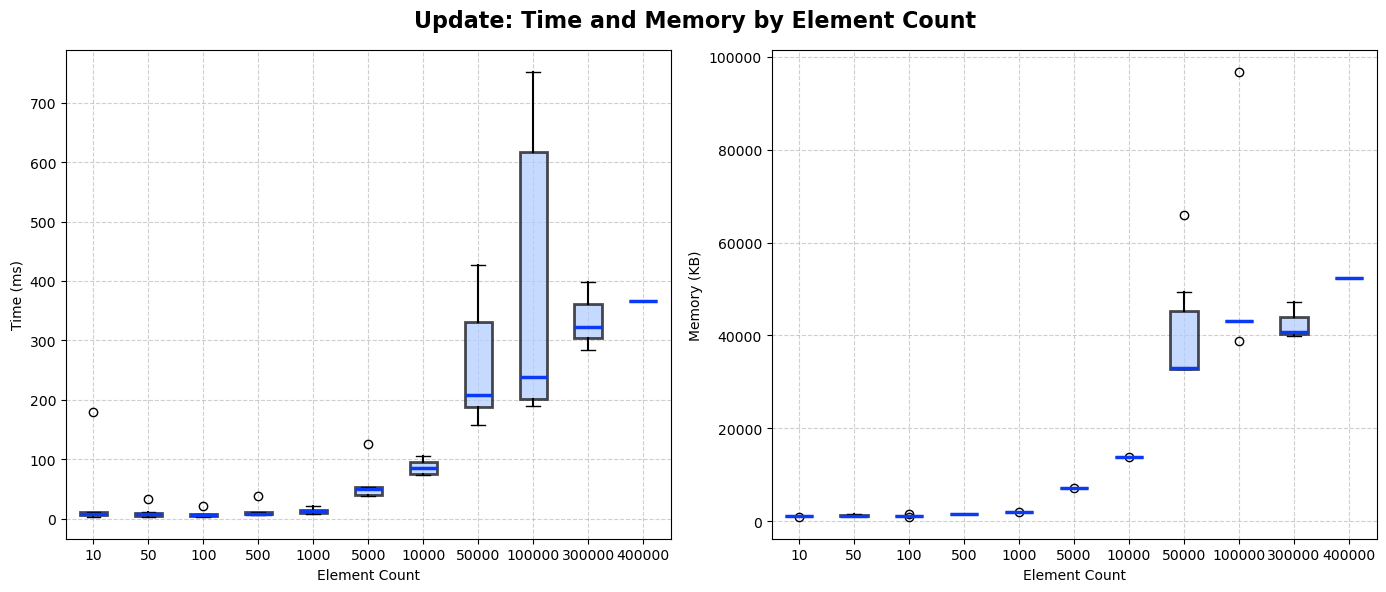

In [30]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
update_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
update_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Update: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Delete Operations

### Delete Single

In [31]:
import pandas as pd
import glob

 
delete_s_run_files = glob.glob('../results/RQ2/DeleteSingle/DeleteSingle_run_*.csv')

# Load and concatenate all runs
delete_s_runs = pd.concat([pd.read_csv(f) for f in delete_s_run_files], ignore_index=True)

ordered_delete_s_runs = delete_s_runs.sort_values('time',ascending=False)

ordered_delete_s_runs.head(10)

,element_count,time,mem
8,100000,598,78821
57,100000,598,75441
7,50000,353,73830
56,50000,344,17408
0,10,250,1026
14,5000,119,9730
18,400000,117,117250
28,400000,99,92884
35,10000,94,18432
5,5000,94,9730


In [32]:
# Group by element count
group_col = 'element_count' 

grouped_delete_s_runs = delete_s_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_delete_s_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,74.333333,15,250,1026.000000,1026,1026
1,50,42.500000,5,70,1025.666667,1024,1026
2,100,4.666667,0,7,1026.000000,1026,1026
3,500,33.833333,2,62,1538.000000,1538,1538
4,1000,14.333333,12,19,2048.000000,2048,2048
5,5000,74.000000,33,119,9473.000000,9216,9730
6,10000,80.000000,61,94,18432.000000,18432,18432
7,50000,144.500000,37,353,38673.333333,17408,73830
8,100000,218.333333,21,598,66330.333333,60930,78821
9,300000,89.000000,85,93,61104.500000,57708,64501


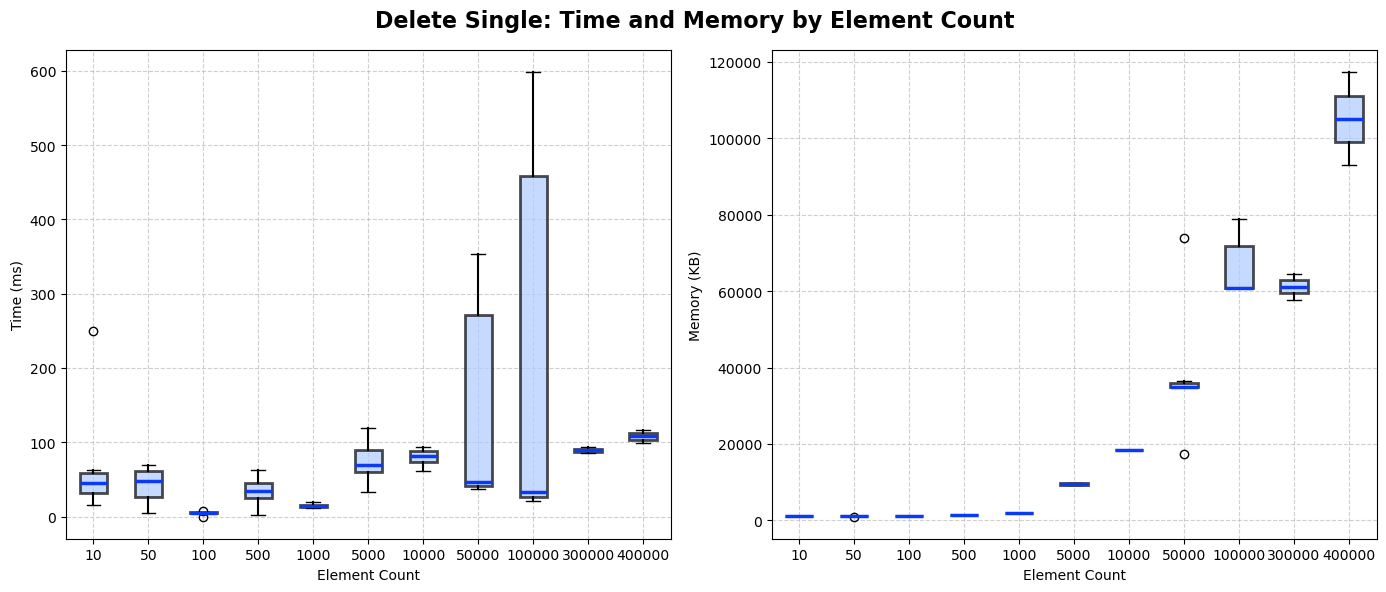

In [33]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
delete_s_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
delete_s_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Delete Single: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Delete Containment Width

In [34]:
import pandas as pd
import glob

 
delete_c_w_run_files = glob.glob('../results/RQ2/DeleteContainmentWidth/DeleteContainmentWidth_run_*.csv')

# Load and concatenate all runs
delete_c_w_runs = pd.concat([pd.read_csv(f) for f in delete_c_w_run_files], ignore_index=True)

ordered_delete_c_w_runs = delete_c_w_runs.sort_values('time',ascending=False)

ordered_delete_c_w_runs.head(10)

,element_count,time,mem
26,400000,3049,46982
46,300000,2360,33705
36,300000,2241,39686
55,100000,1090,60219
8,100000,1059,56933
45,100000,830,97138
35,100000,812,96705
25,100000,783,45295
16,50000,612,79362
24,50000,582,32150


In [35]:
# Group by element count
group_col = 'element_count' 

grouped_delete_c_w_runs = delete_c_w_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_delete_c_w_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,76.833333,5,302,1026.000000,1026,1026
1,50,34.333333,4,93,1025.666667,1024,1026
2,100,6.833333,5,10,1025.666667,1024,1026
3,500,47.333333,9,119,1538.000000,1538,1538
4,1000,14.666667,12,19,2048.000000,2048,2048
5,5000,131.333333,54,271,9216.000000,9216,9216
6,10000,127.500000,79,168,18432.000000,18432,18432
7,50000,536.666667,465,612,66513.000000,18764,90112
8,100000,914.800000,783,1090,71258.000000,45295,97138
9,300000,2300.500000,2241,2360,36695.500000,33705,39686


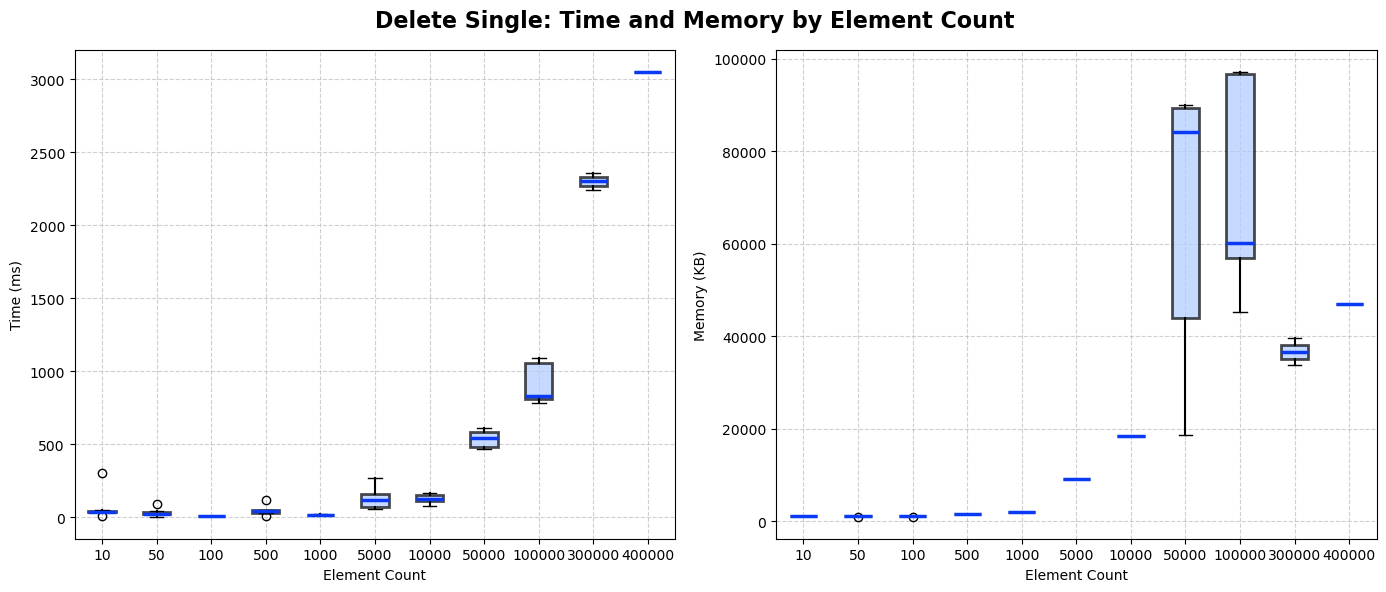

In [36]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
delete_c_w_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
delete_c_w_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Delete Single: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Delete Containment Width

In [37]:
import pandas as pd
import glob 
 
delete_c_d_run_files = glob.glob('../results/RQ2/DeleteContainmentDepth/DeleteContainmentDepth_run_*.csv') 
# Load and concatenate all runs
delete_c_d_runs = pd.concat([pd.read_csv(f) for f in delete_c_d_run_files], ignore_index=True) 
ordered_delete_c_d_runs = delete_c_d_runs.sort_values('time',ascending=False) 
ordered_delete_c_d_runs.head(10)

,element_count,time,mem
17,400000,469,14333
16,100000,350,15358
56,100000,297,31234
26,100000,230,8912
35,50000,230,-14200
45,50000,222,21501
25,50000,196,21502
27,400000,188,9723
13,5000,179,-4510
46,100000,133,14397


In [38]:
# Group by element count
group_col = 'element_count' 

grouped_delete_d_w_runs = delete_c_d_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_delete_d_w_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,25.666667,4,60,277.333333,2,546
1,50,12.333333,4,35,179.500000,2,510
2,100,11.666667,5,32,186.166667,3,491
3,500,15.500000,7,32,703.666667,470,978
4,1000,24.166667,12,47,1172.500000,1021,1293
5,5000,83.166667,42,179,3690.333333,-4510,5624
6,10000,95.833333,69,129,9752.500000,8192,10749
7,50000,120.333333,6,230,6246.333333,-14200,21502
8,100000,228.400000,132,350,16847.000000,8912,31234
9,300000,56.500000,50,63,83.500000,2,165


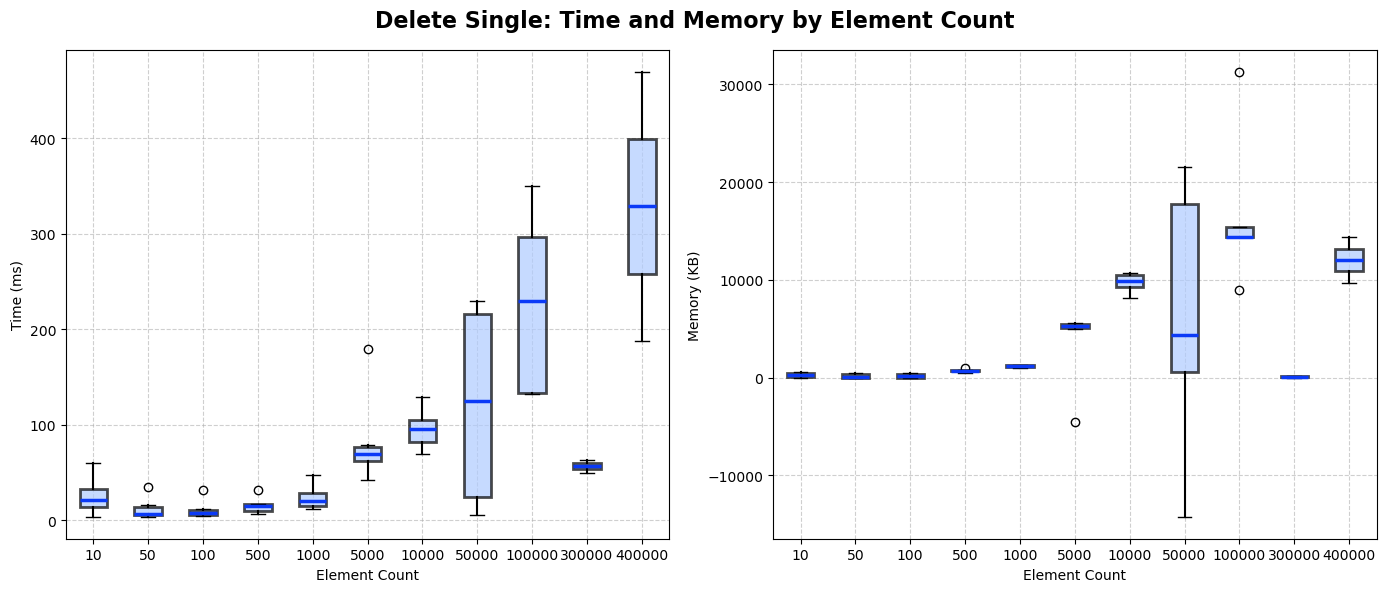

In [39]:
import matplotlib.pyplot as plt

group_col = 'element_count' 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
delete_c_d_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
delete_c_d_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Delete Single: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Delete Cross Ref

In [40]:
import pandas as pd
import glob 
 
delete_c_r_run_files = glob.glob('../results/RQ2/DeleteCrossRef/DeleteCrossRef_run_*.csv') 
# Load and concatenate all runs
delete_c_r_runs = pd.concat([pd.read_csv(f) for f in delete_c_r_run_files], ignore_index=True) 
ordered_delete_c_r_runs = delete_c_r_runs.sort_values('time',ascending=False) 
ordered_delete_c_r_runs.head(10)

,element_count,time,mem
9,400000,11831,14250
19,400000,11581,32020
29,300000,6746,23552
39,300000,6653,23677
18,100000,1023,8340
8,100000,934,8036
48,100000,915,8192
28,100000,886,8192
38,100000,884,8191
7,50000,428,4104


In [41]:
# Group by element count
group_col = 'element_count' 

grouped_delete_d_r_runs = delete_c_r_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_delete_d_r_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,4.6,0,8,607.0,388,681
1,50,4.6,3,6,577.6,335,674
2,100,5.6,0,8,574.0,324,670
3,500,31.0,25,47,569.2,312,668
4,1000,24.8,18,41,579.0,365,667
5,5000,26.8,22,33,615.8,549,664
6,10000,63.8,44,85,1116.6,971,1261
7,50000,357.6,323,428,4153.0,4096,4248
8,100000,928.4,884,1023,8190.2,8036,8340
9,300000,6699.5,6653,6746,23614.5,23552,23677


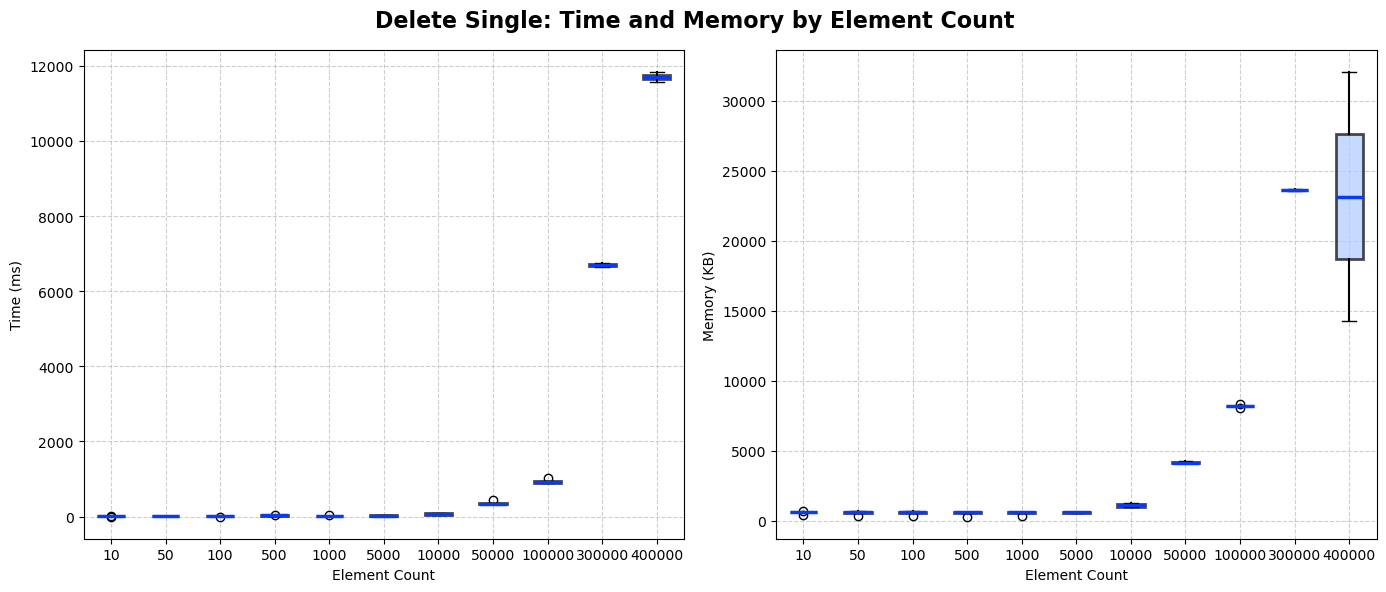

In [42]:
import matplotlib.pyplot as plt

group_col = 'element_count' 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
delete_c_r_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
delete_c_r_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Delete Single: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()